# Determine Top Indictators of Heart Disease Using Multiple Linear Regressors
Author: Tommy Phung
Soruce: Kaggle*

Overview

# Data Exploration
The data was provided by Bhavesh Misra on Kaggle with multiple different columns. The idea of this dataset was to see if we can correlate the different features and attempt to connect them having a heart disease or heart attack. Its important to note that some of the columns are a little ambigious and that it will not be used for the purpose not misintretaing the data or author intentions. 

| **Column Name** | **Description** | **Markers** |
|:---:|:---:|:---:|
| HeartDiseaseorAttack: | Indicates whether the individual has had a heart disease or heart attack | (binary: 0 = No, 1 = Yes) |
| HighBP | High blood pressure status | (binary: 0 = No, 1 = Yes) |
| HighChol | High cholesterol status | (binary: 0 = No, 1 = Yes) |
| CholCheck | Frequency of cholesterol check | categorical |
| BMI | Body Mass Index | continuous |
| Smoker | Smoking status | (binary: 0 = No, 1 = Yes) |
| Stroke | History of stroke | (binary: 0 = No, 1 = Yes) |
| Diabetes | Diabetes status | (binary: 0 = No, 1 = Yes) |
| PhysActivity | Level of physical activity | categorical |
| Fruits | Frequency of fruit consumption | categorical |
| Veggies | Frequency of vegetable consumption | categorical |
| HvyAlcoholConsump | Heavy alcohol consumption status | (binary: 0 = No, 1 = Yes) |
| AnyHealthcare | Access to any healthcare | (binary: 0 = No, 1 = Yes) |
| NoDocbcCost | No doctor because of cost | (binary: 0 = No, 1 = Yes) |
| GenHlth | General health assessment | categorical |
| MentHlth | Mental health assessment | categorical |
| PhysHlth | Level of physical activity | categorical |
| DiffWalk | Difficulty walking status | binary: 0 = No, 1 = Yes |
| Sex | Gender of the individual | binary: 0 = Female, 1 = Male |
| Age | Age of the individual | continuous |
| Education | Educational level | categorical |
| Income | Income level | categorical |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.metrics import f1_score, accuracy_score

In [ ]:
df = pd.read_csv('data/heart_disease_health_indicators.csv')
display(df.head())
display(df.info())

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

None

# Data Preperation
The data comprise of continous, catergorial and binary based columns. In order to perform linear regression on this sort of data, the categorical and binary data must be change to one hot encoding before modeling. There wasn't any missing data from any of the columns so there isn't any data that needed to be removed or changed. 

In [ ]:
cont_col = ['BMI', 'Age']
cat_col = ['Education', 'Income', 'Diabetes']
bin_col = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HighBP', 'HighChol', 'Smoker', 
           'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
on_hold = ['GenHlth','MentHlth', 'PhysHlth']
target = 'HeartDiseaseorAttack'

# Baseline Model

In [ ]:
df.corrwith(df.HeartDiseaseorAttack)

HeartDiseaseorAttack    1.000000
HighBP                  0.209347
HighChol                0.180744
CholCheck               0.044202
BMI                     0.052927
Smoker                  0.114451
Stroke                  0.202978
Diabetes                0.180220
PhysActivity           -0.087284
Fruits                 -0.019822
Veggies                -0.039117
HvyAlcoholConsump      -0.028983
AnyHealthcare           0.018726
NoDocbcCost             0.030994
GenHlth                 0.258380
MentHlth                0.064632
PhysHlth                0.181750
DiffWalk                0.212700
Sex                     0.086082
Age                     0.221588
Education              -0.099556
Income                 -0.140966
dtype: float64

From the corralation with the target variable, I looked at all the columns with over 10% collation and see if this may help the model. It is also good to note that there was one that had a negative correlation, Income. This would hint that the higher that individual income, the lower the chance of heart disease. Income is a mixed bag as this feature have indirect influence to other features like fruits, education and Health Care. 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalar = MinMaxScaler()
scaled_df = pd.DataFrame(scalar.fit_transform(df), columns= df.columns)
X = scaled_df[scaled_df.columns[1:]]
y = scaled_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_reg.score(X_test, y_test)

0.9072789201463353

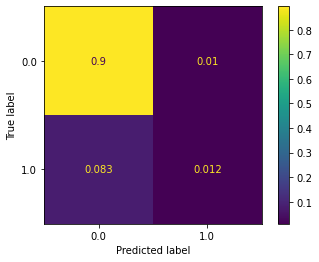

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, normalize= 'all')

## Model 1 Anaysis
With a 90.89% accuracy, at first glance, the model appears to perform really well. However, we had looked at the class distrubtion and it shows that the data had a imbalance. In other words, the model would most likely predict a patient not to have any issues than to have one. 98% of the data were labeled no heart disease and only 2% for haivng a heart disease. In contrast, the actual distribtuion we closer to a 90:10.   

The current solution to improve the model would to under or over sample the data to help balance the data. Both have their own issues. 

In [ ]:
result_coef = sorted(list(zip(log_reg.feature_names_in_, log_reg.coef_[0])), key= lambda x: x[1], reverse= True)
result_coef

[('Age', 3.082663256922887),
 ('GenHlth', 1.9587358357705165),
 ('Stroke', 0.971523370859251),
 ('Sex', 0.7481189542510812),
 ('HighChol', 0.6091113284137889),
 ('CholCheck', 0.5176925591333713),
 ('HighBP', 0.502442805987826),
 ('Smoker', 0.36574303913921535),
 ('Diabetes', 0.3012259093465833),
 ('DiffWalk', 0.2960245957724195),
 ('NoDocbcCost', 0.24533377867386907),
 ('BMI', 0.15287048665378244),
 ('PhysHlth', 0.07981884528465177),
 ('MentHlth', 0.052647663511226045),
 ('Education', 0.05250461843148303),
 ('Veggies', 0.05125931052802804),
 ('PhysActivity', 0.050531334532317486),
 ('Fruits', -0.0008900785449631777),
 ('AnyHealthcare', -0.014794720964885951),
 ('Income', -0.2732508462025925),
 ('HvyAlcoholConsump', -0.27687309126011056)]

From the Coefficeint, we can how strong the feature relate to the target columns. For the most part, we can reason the top coeffience and the smallest. For example, Age and genreal health is indicative to heart disease or any disease in general. Then there is the causes of most heart disease with heart related symthos syuch as Strokes, High Colesterold and Higher Blood Pressure. As we go down the list, Education, Veggie, fruits and pychical health and activait have a lower coefficient. Some interesting results regarding the coeffiecnet was that alcohol consump have a negative effect to the patient likelihood of heart disease. Some of the negative make sense when cosider whtat a postive increase means. Higher incomse would expect a lower chance assuming the money is used for their health and life sytle and AnyHealthCare is asking a simple question with 1 being having it. Altough it is couter intitituve to say that acholoh have no eefect in heart relatived disease, I would personally say that drinking alchold would lower heart disease. Interestingly, studies have been done showing some benfiit in acholoh as it reduces streas that can lead to effects on the hearth that could possibly be explored. 

Model 2
I used KNN algortihm to compare with the logistical regression to seee any differnces from the predictions to get a better accuracy. 

In [ ]:
log_reg.predict_proba(X_test)

array([[0.92782671, 0.07217329],
       [0.99312249, 0.00687751],
       [0.9948459 , 0.0051541 ],
       ...,
       [0.98184261, 0.01815739],
       [0.86178959, 0.13821041],
       [0.84647308, 0.15352692]])

In [ ]:
log_reg.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:

print('F1-Score: {}'.format(f1_score(y_test, log_reg.predict(X_test))))
print('Accuracy: {}'.format(accuracy_score(y_test, log_reg.predict(X_test))))

F1-Score: 0.2021709633649932
Accuracy: 0.9072789201463353


We can see that the model have a high accuracy but poor F1-Score, indicating that the model have a poor evulation in predicting the correct value. 

In [13]:
scaled_df.HeartDiseaseorAttack.value_counts()

0.0    229773
1.0     23888
Name: HeartDiseaseorAttack, dtype: int64

In [16]:
df_pos = scaled_df.loc[scaled_df.HeartDiseaseorAttack == 1]
df_neg = scaled_df.loc[scaled_df.HeartDiseaseorAttack == 0]

In [26]:
df_bal = pd.concat([df_pos, df_neg.sample(n = len(df_pos), random_state= 11)]).sort_index()
df_bal.HeartDiseaseorAttack.value_counts()
df_bal.reset_index(

1.0    23888
0.0    23888
Name: HeartDiseaseorAttack, dtype: int64

In [27]:
X_2 = df_bal[df_bal.columns[1:]]
y_2 = df_bal[target]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2)
log_reg_2 = LogisticRegression()
log_reg_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [28]:
log_reg_2.score(X_test_2, y_test_2)

0.7641493636972538